In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Nehal\\Downloads\\bank-full (1).csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [26]:
X = df.drop(columns=['y'])
y = df['y']

In [16]:
cat_atr=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

In [17]:
le = LabelEncoder()
df[cat_atr] = df[cat_atr].apply(le.fit_transform)

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int32
dtypes: int32(1), int64(16)
memory usage: 5.7 MB


In [24]:
df['age'] = df['age'].astype(float)
df['job'] = df['job'].astype(float)
df['mairtal'] = df['marital'].astype(float)
df['education'] = df['education'].astype(float)
df['default'] = df['default'].astype(float)
df['balance'] = df['balance'].astype(float)
df['housing'] = df['housing'].astype(float)
df['loan'] = df['loan'].astype(float)
df['contact'] = df['contact'].astype(float)
df['day'] = df['day'].astype(float)
df['month'] = df['month'].astype(float)
df['duration'] = df['duration'].astype(float)
df['campaign'] = df['campaign'].astype(float)
df['pdays'] = df['pdays'].astype(float)
df['previous'] = df['previous'].astype(float)
df['poutcome'] = df['poutcome'].astype(float)
df['y'] = df['y'].astype(float)

In [53]:
from sklearn.decomposition import PCA
model=PCA(n_components=2)

#It finds the 2 principle componenets.
model.fit(X)
#reducing 30 features to 2
#Transforms the data into 2 principle components
X_PCA=model.transform(X)
X.shape,X_PCA.shape

((45211, 17), (45211, 2))

In [55]:
model.explained_variance_ratio_

array([0.99181204, 0.00709196])

In [35]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X_PCA, y, random_state=1)

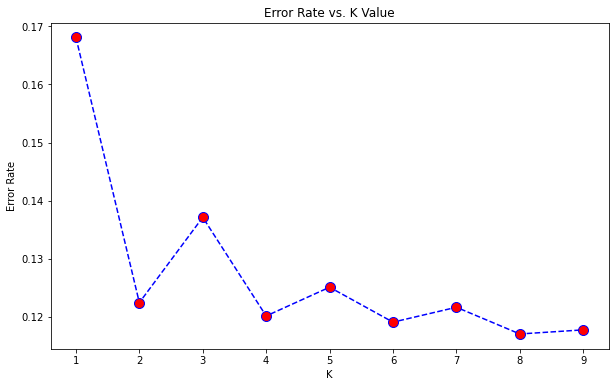

Minimum error:- 0.11704857117579404 at K = 8


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_Train,y_Train)
 pred_i = knn.predict(X_Test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_Test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [42]:
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(X_Train, y_Train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [44]:
y_pred = knn.predict(X_Test)
accuracy_score(y_Test, y_pred)

0.882951428824206

In [47]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(max_depth=10,random_state=42)
df.fit(X_Train,y_Train)
y_pred = df.predict(X_Test)
print(accuracy_score(y_Test,y_pred))

0.8851632310006193


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_Train, y_Train)
y_pred = rf.predict(X_Test)
print(accuracy_score(y_Test,y_pred))

0.8903830841369548


In [51]:
from sklearn.decomposition import PCA
model1=PCA(n_components=3)

#It finds the 2 principle componenets.
model1.fit(X)
#reducing 30 features to 2
#Transforms the data into 2 principle components
X_PCA=model1.transform(X)
X.shape,X_PCA.shape

((45211, 17), (45211, 3))

In [28]:
model1.explained_variance_ratio_

array([0.99181204, 0.00709196, 0.00107287])

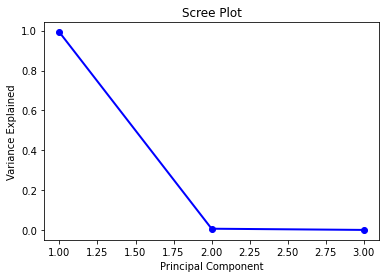

In [29]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(model1.n_components_) + 1
plt.plot(PC_values, model1.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()